In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df = df.iloc[:,1:]

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<AxesSubplot:>

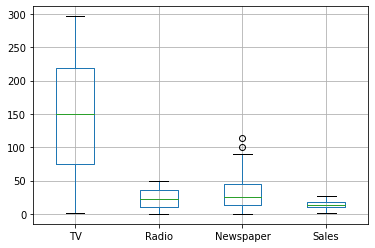

In [7]:
df.boxplot()

In [8]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=348957)

## Gradient boosting algorithm

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(max_depth=2,n_estimators=200)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=200)

In [11]:
## finding the errors at each step
from sklearn.metrics import mean_squared_error

errors = [mean_squared_error(y_test,y_pred) for y_pred in gbr.staged_predict(X_test)]

# finding the location of the minimum error in the errors list and that position will give us the optimal number of tree for 
# gradient boosting

best_n_estimator = np.argmin(errors) + 1

In [12]:
## now again fitting the data on the gradient boost with the obtained optimal number of trees

gbr_best = GradientBoostingRegressor(max_depth=2,n_estimators=best_n_estimator)
gbr_best.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=194)

In [13]:
## finding the predicted values

y_pred = gbr_best.predict(X_test)

In [14]:
## creating a function to find the r2 adjusted score for the Gradient boost regressor

def r2_adj(r):
    n = df.shape[0]
    m = df.shape[1]
    result = 1 - ((1-r**2)*((n-1)/(n-m-1)))
    return result

In [17]:
from sklearn.metrics import r2_score

print(f"The r2 score for the gradient boosting algorithm is {np.round(r2_score(y_test,y_pred),3)}")
print(f"The r2 adjusted score for the gradient boosting algorithm is {np.round(r2_adj(r2_score(y_test,y_pred)),3)}")

The r2 score for the gradient boosting algorithm is 0.982
The r2 adjusted score for the gradient boosting algorithm is 0.963


## Extreme gradient boosting

In [19]:
import xgboost

In [24]:
xgb = xgboost.XGBRegressor()
xgb.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=5)

## note: early_stopping_rounds parameter will stop the training once we find the same residual given number of times

[0]	validation_0-rmse:9.69440
[1]	validation_0-rmse:6.89623
[2]	validation_0-rmse:4.96964
[3]	validation_0-rmse:3.60131
[4]	validation_0-rmse:2.65508
[5]	validation_0-rmse:1.98892
[6]	validation_0-rmse:1.54476
[7]	validation_0-rmse:1.24049
[8]	validation_0-rmse:1.04111
[9]	validation_0-rmse:0.91201
[10]	validation_0-rmse:0.83840
[11]	validation_0-rmse:0.80183
[12]	validation_0-rmse:0.78051
[13]	validation_0-rmse:0.75691
[14]	validation_0-rmse:0.73347
[15]	validation_0-rmse:0.72156
[16]	validation_0-rmse:0.71323
[17]	validation_0-rmse:0.70673
[18]	validation_0-rmse:0.70327
[19]	validation_0-rmse:0.70259
[20]	validation_0-rmse:0.69861
[21]	validation_0-rmse:0.69720
[22]	validation_0-rmse:0.69507
[23]	validation_0-rmse:0.69279
[24]	validation_0-rmse:0.68772
[25]	validation_0-rmse:0.68107
[26]	validation_0-rmse:0.68122
[27]	validation_0-rmse:0.68182
[28]	validation_0-rmse:0.68218
[29]	validation_0-rmse:0.68223


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [25]:
y_pred_xgb = xgb.predict(X_test)

In [27]:
print(f"The r2 score for the extreme gradient boosting algorithm is {np.round(r2_score(y_test,y_pred_xgb),3)}")
print(f"The r2 adjusted score for the extreme gradient boosting algorithm is {np.round(r2_adj(r2_score(y_test,y_pred_xgb)),3)}")

The r2 score for the extreme gradient boosting algorithm is 0.978
The r2 adjusted score for the extreme gradient boosting algorithm is 0.955


In [28]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)

Ridge(alpha=1)

In [29]:
y_pred_ridge = ridge.predict(X_test)

In [31]:
print(f"The r2 score for the ridge regression algorithm is {np.round(r2_score(y_test,y_pred_ridge),3)}")
print(f"The r2 adjusted score for the ridge regression algorithm is {np.round(r2_adj(r2_score(y_test,y_pred_ridge)),3)}")

The r2 score for the ridge regression algorithm is 0.884
The r2 adjusted score for the ridge regression algorithm is 0.777


**Results look much better in case of boosting algorithms than the ridge regression (linear model)**